In [59]:
# ===Import Thư Viện Cơ Bản ===
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import sys
import os
import time # Thêm import time
print(f"Đã cài đặt thành công các thư viện")


Đã cài đặt thành công các thư viện


In [60]:
# ===Xử lý Python Path ===
try:
    module_path=os.path.dirname(os.path.abspath(__file__))
except NameError as e:
    module_path=os.path.abspath('.')
    print(f"Biến __file__ không tồn tại, sử dụng CWD làm module_path: {module_path}")
print(f"Đường dẫn của module là: {module_path}")
if module_path not in sys.path:
    sys.path.append(module_path)
print(f"Đã thêm đường dẫn của module vào sys.path")

Biến __file__ không tồn tại, sử dụng CWD làm module_path: /Users/namtran/practice.py/mini_project_cats_dogs/src
Đường dẫn của module là: /Users/namtran/practice.py/mini_project_cats_dogs/src
Đã thêm đường dẫn của module vào sys.path


In [61]:
# ===Chạy các Notebook Thành phần ===

# --- Chạy data_set_transfer.ipynb ---
print(f"\nĐang chạy data_set_transfer.ipynb...") 
try:
    %run ./data_set_transfer.ipynb 
    if 'train_loader' not in locals(): raise NameError('train_loader not found')
    if 'validation_loader' not in locals(): raise NameError('validation_loader not found')
    if 'num_classes' not in locals(): raise NameError('num_classes not found') # Là 2
    if 'batch_size' not in locals(): raise NameError("'batch_size' không được định nghĩa")
    if 'img_size' not in locals(): raise NameError("'img_size' không được định nghĩa")
    if img_size != 224 : print(f"CẢNH BÁO: IMG_SIZE is {img_size}, expected 224 for ResNet")
    print(f"Đã chạy thành công data_set_transfer.ipynb.") 
except Exception as e:
    print(f"Đã xảy ra lỗi khi chạy data_set_transfer.ipynb: {e}") 
    raise

# --- Chạy model_transfer.ipynb ---
print(f"\nĐang chạy model_transfer.ipynb...") 
try:
    %run ./model_transfer.ipynb 
    print(f"Đã chạy thành công model_transfer.ipynb.") 
except Exception as e:
    print(f"LỖI khi chạy model_transfer.ipynb: {e}") 
    raise

# --- Kiểm tra biến/lớp ---
try:
    _ =get_pretrained_resnet 
    _ =nn.BCEWithLogitsLoss
except NameError as e:
    print(f"Đã xảy ra lỗi NameError: {e}")
    print(f"Vui lòng kiểm tra lại các notebook .ipynb đã chạy và định nghĩa bên trong.")
    sys.exit(1) 
print(f"Đã kiểm tra thành công các biến/lớp/hàm cần thiết.")




Đang chạy data_set_transfer.ipynb...
Đã import các thư viện
Thư mục train : /Users/namtran/practice.py/mini_project_cats_dogs/data/train
Thư mục validation : /Users/namtran/practice.py/mini_project_cats_dogs/data/validation
:Kích thước ảnh chuẩn hoá : 50176
Kích thước lô dữ liệu : 35
Đã định nghĩa các phép biến đổi cho tập train và validation
Tạo đối tượng thành công
Số lớp : 2
Tên lớp : ['cats', 'dogs']
Chỉ số lớp : {'cats': 0, 'dogs': 1}
Đã tạo thành công DataLoader cho tập train và validation
Kiểm tra dataloader
Kích thước ảnh kiểm tra : torch.Size([35, 3, 224, 224])
Kích thước nhãn kiểm tra : torch.Size([35])
Kiểm tra dataloader thành công
Đã kiểm tra dataloader thành công
Đã chạy thành công data_set_transfer.ipynb.

Đang chạy model_transfer.ipynb...
Đã import các thư viện cần thiết
Test model
Test 1: Tạo model với backbone bị đóng băng
Bắt đầu tải model
Đã tải xong model
Đang đóng băng trọng số backbone
Đã đóng băng trọng số backbone
Đang thay thế lớp phân loại cuối cùng
Số lượng

In [62]:
# === Thiết lập Tham số Huấn luyện và Device ===
print("\nTrain Transfer - Thiết lập tham số huấn luyện và Device...")
learning_rate = 0.001       
num_epochs = 6              
print(f"Train Transfer - Sử dụng các tham số đã load: BATCH_SIZE={batch_size}, IMG_SIZE={img_size}")
print(f"Train Transfer - Thiết lập: LEARNING_RATE={learning_rate}, NUM_EPOCHS={num_epochs}")


# --- Paths ---
checkpoint_dir = '../checkpoints' 
result_dir = '../output'     

# --- Tạo Thư mục ---
# Đảm bảo các thư mục này tồn tại trước khi lưu file vào đó.
os.makedirs(checkpoint_dir, exist_ok=True) # exist_ok=True: Không báo lỗi nếu thư mục đã tồn tại.
os.makedirs(result_dir, exist_ok=True)
print(f"Train Transfer - Đã đảm bảo thư mục checkpoints ('{os.path.abspath(checkpoint_dir)}') và output ('{os.path.abspath(result_dir)}') tồn tại.")

# --- Xác định Device ---
# Chọn thiết bị phần cứng (CPU hoặc GPU) để chạy huấn luyện.
print("Train Transfer - Xác định thiết bị tính toán...")
if torch.backends.mps.is_available():       
    device= torch.device("mps")            
    print(f"Train Transfer - Sử dụng DEVICE: MPS (Apple GPU)")
elif torch.cuda.is_available():             
     device = torch.device("cuda")          
     print(f"Train Transfer - Sử dụng DEVICE: CUDA (NVIDIA GPU)")
else:                                       
    device = torch.device("cpu")            
    print(f"Train Transfer - Sử dụng DEVICE: CPU")
print("Train Transfer - Hoàn thành thiết lập tham số và Device.")


Train Transfer - Thiết lập tham số huấn luyện và Device...
Train Transfer - Sử dụng các tham số đã load: BATCH_SIZE=35, IMG_SIZE=224
Train Transfer - Thiết lập: LEARNING_RATE=0.001, NUM_EPOCHS=6
Train Transfer - Đã đảm bảo thư mục checkpoints ('/Users/namtran/practice.py/mini_project_cats_dogs/checkpoints') và output ('/Users/namtran/practice.py/mini_project_cats_dogs/output') tồn tại.
Train Transfer - Xác định thiết bị tính toán...
Train Transfer - Sử dụng DEVICE: MPS (Apple GPU)
Train Transfer - Hoàn thành thiết lập tham số và Device.


In [63]:
# === Khởi tạo Model, Loss, Optimizer ===
print("\nTrain Transfer - Khởi tạo Model, Loss, Optimizer...") 

# ---Khởi tạo Model ---
try:
    model = get_pretrained_resnet(num_classes=1, freeze_backbone=True)
    model.to(device)
    print(f"Train Transfer - Model '{type(model).__name__}' đã tạo và chuyển sang {device}.")
except Exception as e:
    print(f"LỖI khi khởi tạo model: {e}")
    raise 

# ---Khởi tạo Hàm Loss ---
criterion = nn.BCEWithLogitsLoss() 
print(f"Train Transfer - Hàm loss đã tạo: {type(criterion).__name__}")


# ---Khởi tạo Optimizer ---
print("Train Transfer - Chỉ định tham số cho optimizer (chỉ lớp cuối)...")
params_to_update = []
# Lặp qua tất cả các tham số của model.
for name, param in model.named_parameters():
    if param.requires_grad:
        params_to_update.append(param) # Thêm tham số cần huấn luyện vào list.
        print(f"\tParameter to optimize: {name} (Shape: {param.shape})") # In ra tham số sẽ được tối ưu.

# Kiểm tra xem có tham số nào được tìm thấy không.
if not params_to_update:
    print("LỖI: Không tìm thấy tham số nào để tối ưu hóa! Có thể model bị đóng băng hoàn toàn?")
    exit() 

# Khởi tạo optimizer Adam, chỉ truyền vào list các tham số cần cập nhật.
optimizer = optim.Adam(params_to_update, lr=learning_rate)

print(f"Train Transfer - Optimizer '{type(optimizer).__name__}' đã tạo với LR={learning_rate}.")
print("Train Transfer - Hoàn thành khởi tạo Model, Loss, Optimizer.")


Train Transfer - Khởi tạo Model, Loss, Optimizer...
Bắt đầu tải model
Đã tải xong model
Đang đóng băng trọng số backbone
Đã đóng băng trọng số backbone
Đang thay thế lớp phân loại cuối cùng
Số lượng đặc trưng đầu vào của lớp phân loại cuối cùng: 2048
Lớp phân loại mới: Linear(in_features=2048, out_features=1, bias=True)
Đã thay thế lớp phân loại cuối cùng
Thông tin về các tham số của model
Tên tham số: fc.weight, kích thước: torch.Size([1, 2048]), requires_grad: True
Tên tham số: fc.bias, kích thước: torch.Size([1]), requires_grad: True
Tổng số tham số có thể huấn luyện: 2049
Train Transfer - Model 'ResNet' đã tạo và chuyển sang mps.
Train Transfer - Hàm loss đã tạo: BCEWithLogitsLoss
Train Transfer - Chỉ định tham số cho optimizer (chỉ lớp cuối)...
	Parameter to optimize: fc.weight (Shape: torch.Size([1, 2048]))
	Parameter to optimize: fc.bias (Shape: torch.Size([1]))
Train Transfer - Optimizer 'Adam' đã tạo với LR=0.001.
Train Transfer - Hoàn thành khởi tạo Model, Loss, Optimizer.


In [64]:
# ===Định nghĩa Hàm Accuracy và Chuẩn bị Lưu trữ History ===

print("\nTrain Transfer - Defining accuracy function and initializing history lists...")

# ---Định nghĩa Hàm Tính Accuracy ---
def calculate_accuracy_binary(outputs, labels, criterion_instance):
    # Kiểm tra loại hàm loss để biết cách xử lý 'outputs'.
    if isinstance(criterion_instance, nn.BCEWithLogitsLoss):
        # Nếu là BCEWithLogitsLoss, 'outputs' là logits. Cần áp dụng sigmoid và ngưỡng.
        predicted = torch.sigmoid(outputs) > 0.5 
    else:
        predicted = outputs > 0.5 
    # Đếm số dự đoán đúng bằng cách so sánh element-wise.
    correct = (predicted == labels).sum().item() # .item() lấy giá trị int.
    # Lấy tổng số mẫu trong batch.
    total = labels.size(0)
    # Tính accuracy, tránh chia cho 0 nếu batch rỗng.
    accuracy = correct / total if total > 0 else 0
    # Trả về accuracy, số đúng, tổng số.
    return accuracy, correct, total
print("Train Transfer - Hàm calculate_accuracy_binary đã định nghĩa.")


# ---Khởi tạo Danh sách Lưu trữ History ---
train_losses = []       
val_losses = []         
train_accuracies = []   
val_accuracies = []     
print("Train Transfer - History lists (losses, accuracies) đã khởi tạo.")



best_val_accuracy = 0.0
best_model_path = os.path.join(checkpoint_dir, 'best_model_resnet.pth') 
print(f"Train Transfer - Sẽ lưu model tốt nhất (dựa trên Val Acc) vào: {best_model_path}")
print("Train Transfer - Hoàn thành chuẩn bị hàm accuracy và history.")


Train Transfer - Defining accuracy function and initializing history lists...
Train Transfer - Hàm calculate_accuracy_binary đã định nghĩa.
Train Transfer - History lists (losses, accuracies) đã khởi tạo.
Train Transfer - Sẽ lưu model tốt nhất (dựa trên Val Acc) vào: ../checkpoints/best_model_resnet.pth
Train Transfer - Hoàn thành chuẩn bị hàm accuracy và history.


In [65]:
# ===Vòng lặp Huấn luyện và Đánh giá ===
# Thực hiện quá trình học của model qua các epoch.
print(f"\n--- Train Transfer - Bắt đầu Huấn luyện {num_epochs} epochs ---")

training_start_time = time.time()

# Vòng lặp chính qua các epoch. range(NUM_EPOCHS) tạo dãy số từ 0 đến NUM_EPOCHS-1.
for epoch in range(num_epochs):
    epoch_start_time = time.time()
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")

    # ---Pha Training ---
    model.train()
    running_train_loss = 0.0 
    correct_train = 0        
    total_train = 0          
    print(f"  Training...")   

    # Lặp qua từng batch dữ liệu từ train_loader.
    # train_loader trả về (images, labels) cho mỗi batch.
    for batch_idx, (images, labels) in enumerate(train_loader, 1):
        images = images.to(device)
        labels = labels.float().unsqueeze(1).to(device)

        
        optimizer.zero_grad()           
        outputs = model(images)         
        loss = criterion(outputs, labels) 
        loss.backward()                 
        optimizer.step()                

        
        running_train_loss += loss.item() * images.size(0) 
        _, batch_correct, batch_total = calculate_accuracy_binary(outputs, labels, criterion)
        correct_train += batch_correct 
        total_train += batch_total     

    
    epoch_train_loss = running_train_loss / total_train if total_train > 0 else 0
    epoch_train_acc = correct_train / total_train if total_train > 0 else 0
    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    # ---Pha Validation ---
    model.eval()
    running_val_loss = 0.0 
    correct_val = 0        
    total_val = 0          
    print(f"  Validating...") 
    with torch.no_grad():
        # Lặp qua từng batch dữ liệu từ validation_loader.
        for images, labels in validation_loader:
            # Chuyển dữ liệu batch lên DEVICE.
            images = images.to(device)
            # Chuẩn bị nhãn.
            labels = labels.float().unsqueeze(1).to(device)
            # Chỉ thực hiện forward pass.
            outputs = model(images)
            # Tính loss (vẫn cần để theo dõi).
            loss = criterion(outputs, labels)

            
            running_val_loss += loss.item() * images.size(0) 
            _, batch_correct, batch_total = calculate_accuracy_binary(outputs, labels, criterion)
            correct_val += batch_correct 
            total_val += batch_total     

    
    epoch_val_loss = running_val_loss / total_val if total_val > 0 else 0
    epoch_val_accuracy = correct_val / total_val if total_val > 0 else 0
    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_accuracy)

    # Ghi lại thời điểm kết thúc epoch.
    epoch_end_time = time.time()
    # In ra bảng tổng kết kết quả của epoch này.
    print("-" * 70) # Dòng phân cách.
    # Định dạng output cho dễ đọc: epoch (2 chữ số), thời gian, loss/acc train, loss/acc validation.
    print(f"Epoch [{epoch+1:02d}/{num_epochs}] - "
          f"Time: {epoch_end_time - epoch_start_time:.2f}s - "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.4f}")
    print("-" * 70) # Dòng phân cách.

    # ---Lưu Model Tốt Nhất ---
    # So sánh validation accuracy của epoch này với accuracy tốt nhất đã lưu.
    if epoch_val_accuracy > best_val_accuracy:
        print(f"  Validation accuracy improved ({best_val_accuracy:.4f} --> {epoch_val_accuracy:.4f}). Saving best model...")
        best_val_accuracy = epoch_val_accuracy 
        try:
            torch.save(model.state_dict(), best_model_path)
            print(f"  Best model saved to {best_model_path}")
        except Exception as e:
            print(f"  ERROR saving best model: {e}")

# --- Kết thúc toàn bộ vòng lặp huấn luyện ---
training_end_time = time.time() 
total_training_time = training_end_time - training_start_time 
print(f"\n--- Train Transfer - Huấn luyện hoàn tất sau {total_training_time:.2f} giây ({total_training_time/60:.2f} phút) ---")

print(f"Best Validation Accuracy achieved: {best_val_accuracy:.4f}")


--- Train Transfer - Bắt đầu Huấn luyện 6 epochs ---

Epoch [1/6]
  Training...


/Users/namtran/Applications/anaconda3/envs/vy_minh_clean/lib/python3.10/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


  Validating...
----------------------------------------------------------------------
Epoch [01/6] - Time: 515.99s - Train Loss: 0.2119, Train Acc: 0.9279 | Val Loss: 0.0494, Val Acc: 0.9892
----------------------------------------------------------------------
  Validation accuracy improved (0.0000 --> 0.9892). Saving best model...
  Best model saved to ../checkpoints/best_model_resnet.pth

Epoch [2/6]
  Training...
  Validating...
----------------------------------------------------------------------
Epoch [02/6] - Time: 479.50s - Train Loss: 0.1385, Train Acc: 0.9433 | Val Loss: 0.0354, Val Acc: 0.9912
----------------------------------------------------------------------
  Validation accuracy improved (0.9892 --> 0.9912). Saving best model...
  Best model saved to ../checkpoints/best_model_resnet.pth

Epoch [3/6]
  Training...
  Validating...
----------------------------------------------------------------------
Epoch [03/6] - Time: 492.64s - Train Loss: 0.1292, Train Acc: 0.9474 


Train Transfer - Đang vẽ đồ thị learning curves...
Train Transfer - Đã lưu đồ thị vào ../output/learning_curves_transfer.png


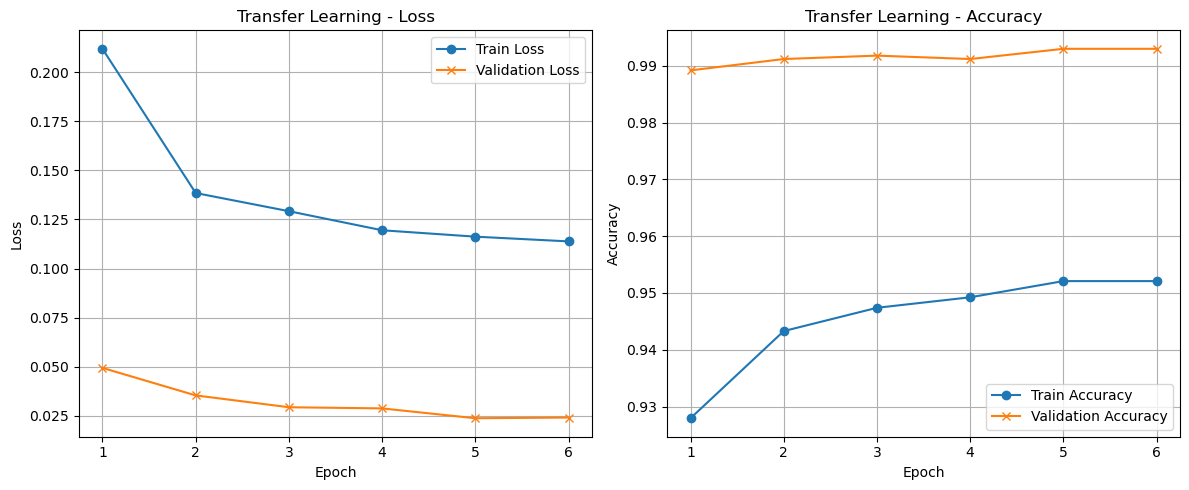

In [67]:
# ===Vẽ đồ thị Learning Curves ===
print("\nTrain Transfer - Đang vẽ đồ thị learning curves...")
try:
    plt.figure(figsize=(12, 5)) 
    epoch_range = range(1, num_epochs + 1)

    # ---Đồ thị Loss ---
    plt.subplot(1, 2, 1) 
    plt.plot(epoch_range, train_losses, label='Train Loss', marker='o')
    plt.plot(epoch_range, val_losses, label='Validation Loss', marker='x')
    plt.title('Transfer Learning - Loss') 
    plt.xlabel('Epoch')              
    plt.ylabel('Loss')               
    plt.legend()                     
    plt.grid(True)                   

    # --- Đồ thị Accuracy ---
    plt.subplot(1, 2, 2) 
    plt.plot(epoch_range, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(epoch_range, val_accuracies, label='Validation Accuracy', marker='x')
    plt.title('Transfer Learning - Accuracy') 
    plt.xlabel('Epoch')                  
    plt.ylabel('Accuracy')               
    plt.legend()                         
    plt.grid(True)                       
    plt.tight_layout() #
    # Tạo đường dẫn lưu file đồ thị (tên file mới).
    graph_save_path = os.path.join(result_dir, 'learning_curves_transfer.png')
    plt.savefig(graph_save_path) # Lưu đồ thị.
    print(f"Train Transfer - Đã lưu đồ thị vào {graph_save_path}")
    plt.show() 
except Exception as e:
    print(f"Train Transfer - Lỗi khi vẽ hoặc lưu đồ thị: {e}")
    raise 